# Wisesight Sentiment with G-ZIP

In [24]:
# Data libraries
import numpy as np
import pandas as pd

# Text preprocessing libraries
import re
from nltk.tokenize import word_tokenize
import emoji
import nltk
nltk.download('punkt')

# GZIP libraries
import gzip
from tqdm import tqdm
from collections import Counter

# Visualization libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Thaweewat\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## 1. Data Preparation

### 1.1. Preprocessing Functions
We define a set of functions to preprocess the data, using the same functions as in original [PyThaiNLP kaggle implementation.](https://github.com/PyThaiNLP/wisesight-sentiment/blob/master/kaggle-competition/competition.ipynb)

- Replace URLs with 'xxurl'
- Replace repeating characters with a condensed notation
- Replace emojis with 'xxemoji'

In [19]:
# Regular expression pattern to match URLs.
URL_PATTERN = r"""(?i)\b((?:https?:(?:/{1,3}|[a-z0-9%])|[a-z0-9.\-]+[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)/)(?:[^\s()<>{}\[\]]+|\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\))+(?:\([^\s()]*?\([^\s()]+\)[^\s()]*?\)|\([^\s]+?\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’])|(?:(?<!@)[a-z0-9]+(?:[.\-][a-z0-9]+)*[.](?:com|net|org|edu|gov|mil|aero|asia|biz|cat|coop|info|int|jobs|mobi|museum|name|post|pro|tel|travel|xxx|ac|ad|ae|af|ag|ai|al|am|an|ao|aq|ar|as|at|au|aw|ax|az|ba|bb|bd|be|bf|bg|bh|bi|bj|bm|bn|bo|br|bs|bt|bv|bw|by|bz|ca|cc|cd|cf|cg|ch|ci|ck|cl|cm|cn|co|cr|cs|cu|cv|cx|cy|cz|dd|de|dj|dk|dm|do|dz|ec|ee|eg|eh|er|es|et|eu|fi|fj|fk|fm|fo|fr|ga|gb|gd|ge|gf|gg|gh|gi|gl|gm|gn|gp|gq|gr|gs|gt|gu|gw|gy|hk|hm|hn|hr|ht|hu|id|ie|il|im|in|io|iq|ir|is|it|je|jm|jo|jp|ke|kg|kh|ki|km|kn|kp|kr|kw|ky|kz|la|lb|lc|li|lk|lr|ls|lt|lu|lv|ly|ma|mc|md|me|mg|mh|mk|ml|mm|mn|mo|mp|mq|mr|ms|mt|mu|mv|mw|mx|my|mz|na|nc|ne|nf|ng|ni|nl|no|np|nr|nu|nz|om|pa|pe|pf|pg|ph|pk|pl|pm|pn|pr|ps|pt|pw|py|qa|re|ro|rs|ru|rw|sa|sb|sc|sd|se|sg|sh|si|sj|Ja|sk|sl|sm|sn|so|sr|ss|st|su|sv|sx|sy|sz|tc|td|tf|tg|th|tj|tk|tl|tm|tn|to|tp|tr|tt|tv|tw|tz|ua|ug|uk|us|uy|uz|va|vc|ve|vg|vi|vn|vu|wf|ws|ye|yt|yu|za|zm|zw)\b/?(?!@)))"""

def replace_url(text: str) -> str:
	"""
    This function replaces all URLs in the given text with the string 'xxurl'.

    Parameters:
    ----------
    text : str
        The text in which URLs need to be replaced.
        
    Returns:
    -------
    text : str
        The modified text with URLs replaced with 'xxurl'.

    """
	return re.sub(URL_PATTERN, 'xxurl', text)


def replace_repetitions(text: str) -> str:

	"""
    This function identifies repeating characters in the provided text
    and replaces them with a condensed notation.
    
    Condensed notation is the repeating character followed by a string 'xxrep'.

    Nested function _replace is used in substitution, it takes a regex match object
    and returns condensed notation for the matched repeating characters.

    Parameters:
    ----------
    text : str
        The text in which repetitions need to be replaced.
        
    Returns:
    -------
    text : str
        The modified text with repeating characters replaced in condensed form.
    """

	def _replace(match):
		character, repetitions = match.groups()
		return f'{character}xxrep'

	pattern = re.compile(r'(\S)(\1{2,})')
	return pattern.sub(_replace, text)

def ungroup_emoji(toks: list) -> list:
    """
    This function ungroups emojis in the given tokenized text.
    If all characters in a token are emojis, the function 
    separates them into individual tokens.
    Otherwise, the token is appended as it is.
    
    Parameters:
    ----------
    toks : list
        The tokenized text to be ungrouped.
        
    Returns:
    -------
    result : list
        The modified tokenized text with emojis ungrouped.

    """
    result = []
    for tok in toks:
        if emoji.emoji_count(tok) == len(tok):
            result.extend(list(tok))
        else:
            result.append(tok)
    return result

def process_text(text: str) -> list:
    """
    This function processes and tokenizes a given text.

    The text processing includes the steps:
    1. Lower casing the characters
    2. Stripping the extra spaces
    3. Replacing URLs
    4. Replacing repeated characters

    The text is then tokenized and post-processing is done 
    which includes ungrouping of grouped emojis.

    Parameters:
    ----------
    text : str
        The text that needs to be processed and tokenized.

    Returns:
    -------
    processed_text : list
        The processed and tokenized text in the form of a list of words.

    """
    # Apply pre-processing rules
    processed_text = text.lower().strip()
    processed_text = replace_url(processed_text)
    processed_text = replace_repetitions(processed_text)
    processed_text = re.sub(r"[\[\]]", "", processed_text)

    # Tokenize
    processed_text = [word for word in word_tokenize(processed_text)
                      if word and not re.search(pattern=r"\s+", string=word)]

    
    # Apply post-processing rules
    processed_text = ungroup_emoji(processed_text)
    return processed_text

def combine_data_label(data_url: str, label_url: str) -> pd.DataFrame:
    """
    This function combines two data resources: 
    one contains the data and the other contains the labels. 
    Eventually, it processes the text data and returns a 
    combined DataFrame.
    
    Parameters:
    data_url (str): URL of the text data resource as a CSV.
    label_url (str): URL of the labels resource as a CSV.
    
    Returns:
    pd.DataFrame: A combined DataFrame with processed text data 
    and appended labels.
    """

    data = pd.read_csv(data_url, header=None, encoding="utf-8", sep="\t")
    label = pd.read_csv(label_url, header=None, encoding="utf-8", sep="\t")
    data['intent'] = label
    data['text'] = data[0].map(lambda x: ' '.join(process_text(x)))
    data.drop(0, axis=1, inplace=True)
    return data

## 1.2 Load and process dataset

In [41]:
train_data = "https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train.txt"
train_label = "https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/train_label.txt"

test_data = "https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/test.txt"
test_label = "https://raw.githubusercontent.com/PyThaiNLP/wisesight-sentiment/master/kaggle-competition/test_label.txt"

In [42]:
df_train = combine_data_label(train_data, train_label)
df_test = combine_data_label(test_data, test_label)
df_train.sample(5)

,intent,text
7282,neu,ป๋าxxrepจ๋าา
12358,neg,ไม่เคยแดกแล้วอ้วกขนาดนี้เลยโว้ยxxrep สเมอนอฟมิ...
19261,neu,ภาพแอบถ่ายล่าสุด all new nissan teana ( altima...
5310,neg,แต่ของetudeแบบ ติดตัวอย่างมากแค่1-2ชม.เองอะ เห้อม
9647,pos,บีหนึ่งเรียกบีสอง


### 1.3 Create a dictionary of labels

In [43]:
uniq = list(set(df_train["intent"].values))
labels = {j:i for i,j in zip(range(len(uniq)), uniq)}
labels

{'pos': 0, 'neg': 1, 'neu': 2, 'q': 3}

In [44]:
df_train["label"] = df_train["intent"].apply(lambda x: labels[x])
df_test["label"] = df_test["intent"].apply(lambda x: labels[x])

## G-ZIP Original Paper Implementation

In [45]:
k = 2
predicted_classes = []

for row_test in tqdm(df_test.iterrows(), total=df_test.shape[0]):
    test_text = row_test[1]["text"]
    test_label = row_test[1]["label"]
    c_test_text = len(gzip.compress(test_text.encode()))
    distance_from_test_instance = []
    
    for row_train in df_train.iterrows():
        train_text = row_train[1]["text"]
        train_label = row_train[1]["label"]
        c_train_text = len(gzip.compress(train_text.encode()))
        train_plus_test = " ".join([test_text, train_text])
        c_train_plus_test = len(gzip.compress(train_plus_test.encode()))
        
        ncd = ((c_train_plus_test - min(c_train_text, c_test_text))
                / max(c_test_text, c_train_text))
        distance_from_test_instance.append(ncd)
        
    sorted_idx = np.argsort(np.array(distance_from_test_instance))
    top_k_class = df_train.iloc[sorted_idx[:k]]["label"].values
    predicted_class = np.argmax(np.bincount(top_k_class))
    predicted_classes.append(predicted_class)
     
print("Accuracy:", np.mean(np.array(predicted_classes) == df_test["label"].values))

100%|██████████| 2674/2674 [2:48:10<00:00,  3.77s/it]  

Accuracy: 0.5422587883320867


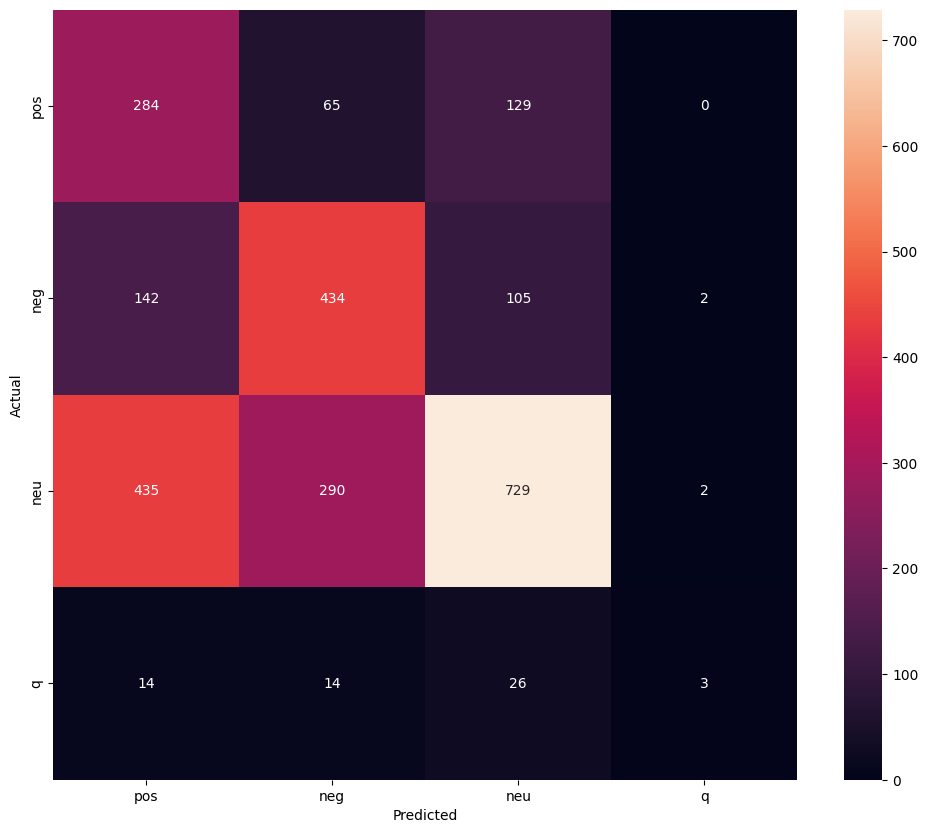

In [46]:
cm = confusion_matrix(df_test["label"].values, np.array(predicted_classes))
# plot with seaborn
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=uniq, yticklabels=uniq)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()


## G-ZIP With Tie-Breaking Fix

In [47]:
k = 2
predicted_classes = []

for row_test in tqdm(df_test.iterrows(), total=df_test.shape[0]):
    test_text = row_test[1]["text"]
    test_label = row_test[1]["label"]
    c_test_text = len(gzip.compress(test_text.encode()))
    distance_from_test_instance = []
    
    for row_train in df_train.iterrows():
        train_text = row_train[1]["text"]
        train_label = row_train[1]["label"]
        c_train_text = len(gzip.compress(train_text.encode()))
        
        train_plus_test = " ".join([test_text, train_text])
        c_train_plus_test = len(gzip.compress(train_plus_test.encode()))
        
        ncd = ( (c_train_plus_test - min(c_train_text, c_test_text))
                / max(c_test_text, c_train_text) )
        distance_from_test_instance.append(ncd)
        
    sorted_idx = np.argsort(np.array(distance_from_test_instance))
    top_k_class = np.array(df_train["label"])[sorted_idx[:k]]
    predicted_class = Counter(top_k_class).most_common()[0][0]
    predicted_classes.append(predicted_class)
        
print("Accuracy:", np.mean(np.array(predicted_classes) == df_test["label"].values))

100%|██████████| 2674/2674 [2:44:16<00:00,  3.69s/it]  

Accuracy: 0.5912490650710546


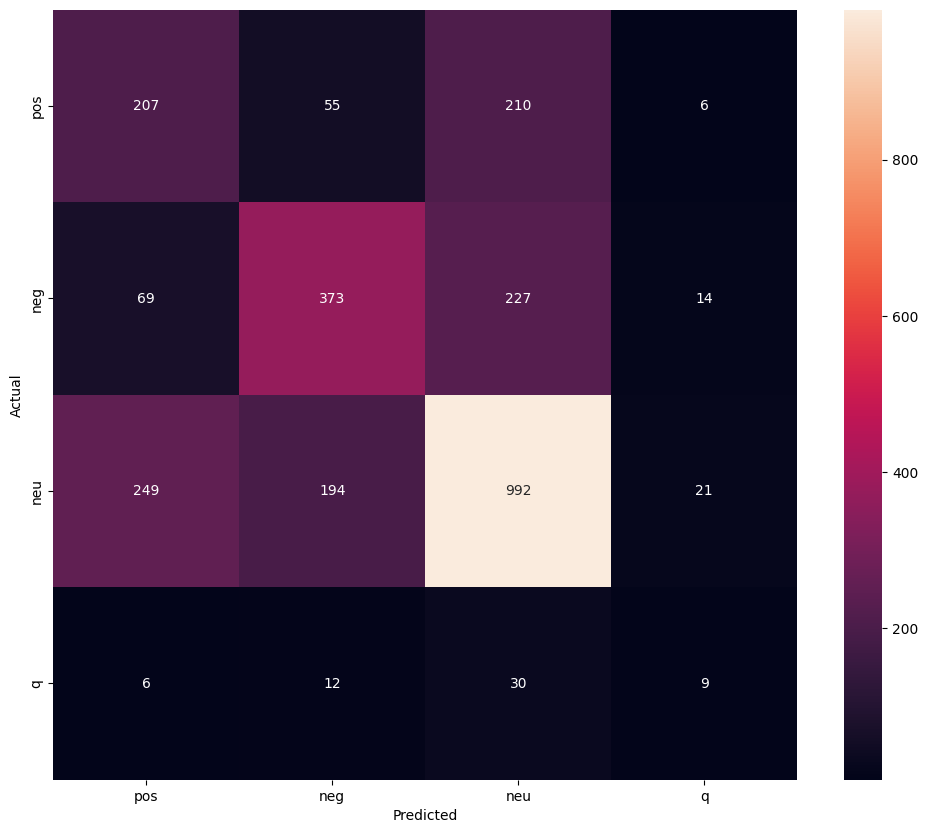

In [48]:
cm = confusion_matrix(df_test["label"].values, np.array(predicted_classes))
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt="d", xticklabels=uniq, yticklabels=uniq)
plt.ylabel("Actual")
plt.xlabel("Predicted")
plt.show()

In [52]:
# sample of unmatched predictions
df_test["predicted"] = predicted_classes
df_test["predicted"] = df_test["predicted"].apply(lambda x: uniq[x])
df_test[df_test["label"] != df_test["predicted"]][['text', 'intent', 'predicted']].sample(10)

,text,intent,predicted
1582,หิวนะ,pos,neu
2126,ให้โลกรู้ไว้แท็กซี่ สีเหลือง ที่ไม่ปฏิเสธลูกค้...,pos,neu
818,วันไหนดีคับ,pos,pos
2369,สุดยอด,pos,neu
658,สำนักงานสาธารณสุขจังหวัดสระแก้ว ร่วมกับ โรงพยา...,neu,neu
1158,ฮอตพอตที จะกินโออิชิเหรอที,neu,neg
90,อิห่า แมคไม่คุ้มเลย เคฟซีน่าแดกกว่า,neg,neg
1165,มีปล่อยอิสระบ้าง แต่ส่วนมากไม่ถึงชั่วโมง เป็นเ...,neu,neg
1148,วันนี้ที่ได้สีไม่ใช่แบบนี้อ่ะก้อน,neg,neu
1126,# ผ้าอนามัยโซฟี บางลงไปเยอะมาก คือเอามาเปรียบเ...,neg,neg
